# French Babynames Data

This dataset consists of first names given to babies in France from 1900 to 2019, released by INSEE (French National Institute of Statistics).

From: [DataCamp](datacamp.com)

In [1]:
# Load packages
import numpy as np 
import pandas as pd 

# Plotting
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
color = sns.color_palette()

# Interaction
from ipywidgets import interact, widgets

## Load your data

In [2]:
# Load data from the csv file
df = pd.read_csv('nat2019.csv')
df.head()

,year,sex,name,births
0,1980,M,A,3
1,1998,M,A,3
2,2009,M,Aadam,4
3,2014,M,Aadam,3
4,2016,M,Aadam,4


## Understand your variables

In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,year,120,"[1980, 1998, 2009, 2014, 2016, 2017, 2018, 197..."
1,sex,2,"[M, F]"
2,name,32415,"[A, Aadam, Aadel, Aadil, Aahil, Aakash, Aaron,..."
3,births,7208,"[3, 4, 5, 6, 9, 11, 12, 8, 7, 10, 15, 16, 14, ..."


## Answer interesting questions: 

Now you get to explore this exciting dataset! Can't think of where to start? Try your hand at these questions:

- What are the most popular names over the years?

### Analysis

In [5]:
df

,year,sex,name,births
0,1980,M,A,3
1,1998,M,A,3
2,2009,M,Aadam,4
3,2014,M,Aadam,3
4,2016,M,Aadam,4
...,...,...,...,...
615947,2015,F,Zyneb,7
615948,2016,F,Zyneb,6
615949,2017,F,Zyneb,6
615950,2018,F,Zyneb,5


There are 615952 names need to be analysis with four columns

In [9]:
df.dtypes

year       int64
sex       object
name      object
births     int64
dtype: object

In [10]:
df.sex.value_counts()

F    335218
M    280734
Name: sex, dtype: int64

Female data is larger than male

In [20]:
df_before_1950 = df[df.year <= 1950]

In [21]:
df_before_1950.value_counts()

year  sex  name          births
1900  F    Abeline       3         1
1935  F    Cosette       34        1
           Claude-Marie  3         1
           Claude        1527      1
           Clarisse      16        1
                                  ..
1919  M    Darius        5         1
           Dante         3         1
           Daniel        606       1
           Damien        25        1
1950  M    Éric          9         1
Length: 107249, dtype: int64

In [32]:
df_before_2000 = df[df.year <= 2000]

In [35]:
df_between_1950_2000 = df_before_2000[df_before_2000.year > 1950]

In [36]:
df_between_1950_2000

,year,sex,name,births
0,1980,M,A,3
1,1998,M,A,3
7,1976,M,Aadel,5
8,1978,M,Aadel,3
9,1980,M,Aadel,3
...,...,...,...,...
615866,1971,F,Zulmira,4
615867,1973,F,Zulmira,4
615868,1974,F,Zulmira,3
615869,1975,F,Zulmira,3


In [37]:
df_after_2000 = df[df.year > 2000]

In [43]:
df_between_2000_2010 = df_after_2000[df_after_2000.year <= 2010]

In [44]:
df_between_2000_2010

,year,sex,name,births
2,2009,M,Aadam,4
34,2003,M,Aadil,3
42,2001,M,Aakash,3
81,2001,M,Aaron,136
82,2002,M,Aaron,131
...,...,...,...,...
615938,2004,F,Zyneb,4
615939,2005,F,Zyneb,5
615940,2006,F,Zyneb,4
615941,2008,F,Zyneb,11


In [41]:
df_after_2010 = df[df.year > 2010]

In [42]:
df_after_2010

,year,sex,name,births
3,2014,M,Aadam,3
4,2016,M,Aadam,4
5,2017,M,Aadam,4
6,2018,M,Aadam,3
35,2015,M,Aadil,6
...,...,...,...,...
615947,2015,F,Zyneb,7
615948,2016,F,Zyneb,6
615949,2017,F,Zyneb,6
615950,2018,F,Zyneb,5


In [45]:
class1 = df_before_1950
class2 = df_between_1950_2000
class3 = df_between_2000_2010
class4 = df_after_2010

In [53]:
len(class1)

107249

In [54]:
len(class2)

272106

In [55]:
len(class3)

114479

In [56]:
len(class4)

122118

In [58]:
len(class1 + class2 + class3 + class4)

615952

In [59]:
len(df)

615952

### What are the most popular names over the years?

Below is the list of top 20 popular names before 1950

<AxesSubplot:>

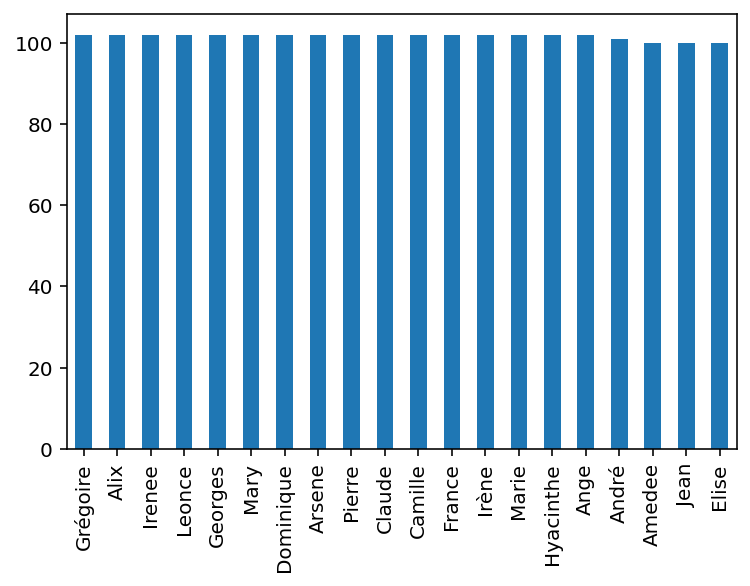

In [63]:
class1.name.value_counts().head(20).plot(kind='bar')

Below is the list of top 20 popular names between 1950 - 2000

<AxesSubplot:>

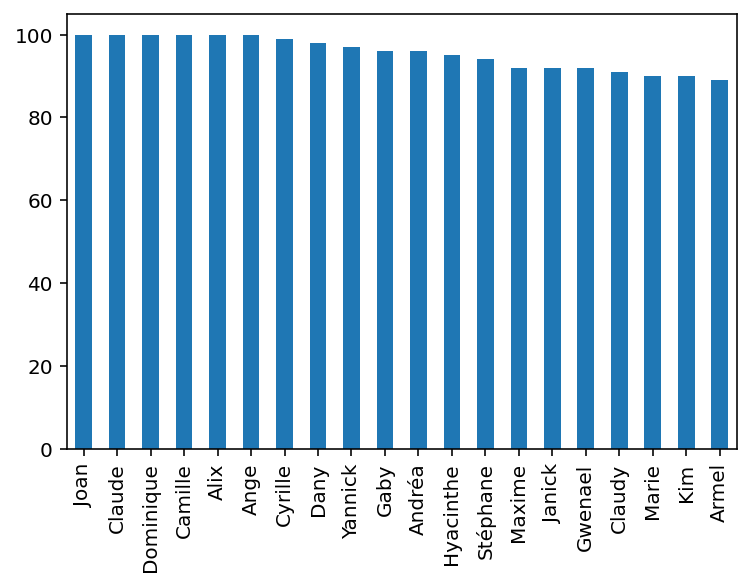

In [68]:
class2.name.value_counts().head(20).plot(kind='bar')

Below is the list of top 120 popular names between 2000 - 2010

In [92]:
class3.name.value_counts().head(120)

Swann      20
Wissem     20
Anael      20
Charlie    20
Mendy      20
           ..
Shane      20
Sam        20
Hilal      20
Ange       20
Islam      19
Name: name, Length: 120, dtype: int64

Below is the list of top 163 popular names after 2010

In [100]:
class4.name.value_counts().head(163)

Sadio      18
Elijah     18
Yael       18
Joey       18
Milane     18
           ..
Wissem     18
Gaya       18
Ness       17
Kamille    17
Elisée     17
Name: name, Length: 163, dtype: int64

It's look like that person has the same name after 2000 more often than before. In every class we can understand that the most common names is different

#### What are the most popular names in all years?

In [102]:
df.name.value_counts()

Camille        240
Ange           240
Alix           240
Dominique      237
Claude         233
              ... 
Hazael           1
Remon            1
Mong             1
Kamylle          1
Pierre-Rémi      1
Name: name, Length: 32415, dtype: int64

<AxesSubplot:>

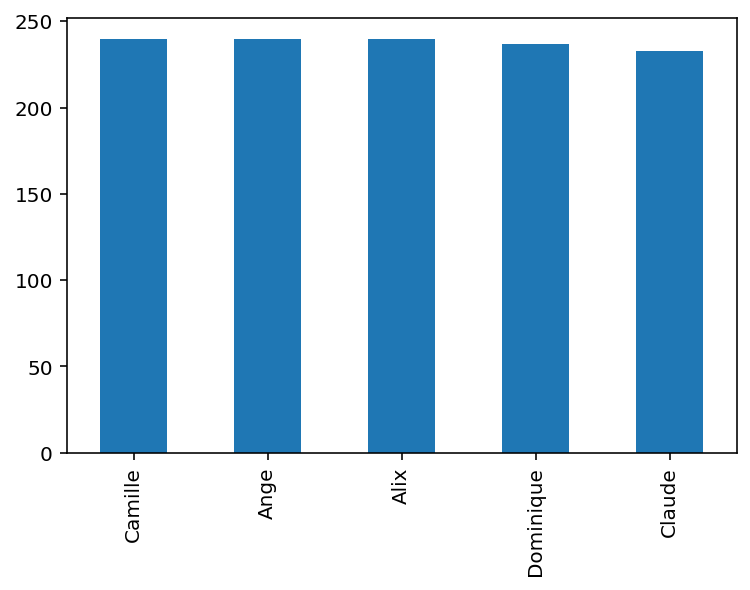

In [103]:
df.name.value_counts().head().plot(kind='bar')

Camile, Ange, and Alix won the place for the most common names over all times in French babynames

## Acknowledgements

The data was downloaded from [INSEE](https://www.insee.fr/fr/statistiques/fichier/2540004/nat2019_csv.zip) and processed to remove missing data. The columns were renamed from french to english. See `download.py` for more details. 